In [25]:
from sklearn.datasets import fetch_openml
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

# Fetching dataset
mnist = fetch_openml('mnist_784')


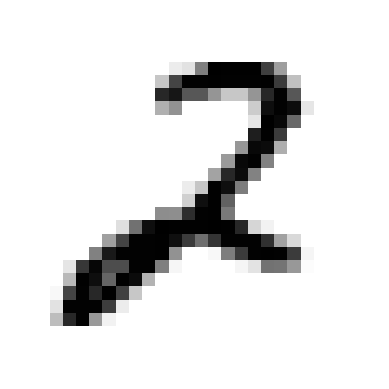

In [23]:
x, y = mnist['data'], mnist['target']

# Display an example digit
some_digit = x.to_numpy()[36001]
some_digit_image = some_digit.reshape(28, 28)  # Reshape to plot it

plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation='nearest')
plt.axis("off")
plt.show()

In [27]:
# Split the dataset into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=10000, random_state=42)

# Convert to NumPy arrays for compatibility
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()

# Scale the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [29]:
# Create a binary target for '2'
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
y_train_2 = (y_train == 2)
y_test_2 = (y_test == 2)

# Train a logistic regression classifier
clf = LogisticRegression(max_iter=10000)  # Increase max_iter to ensure convergence
clf.fit(x_train_scaled, y_train_2)

LogisticRegression(max_iter=10000)

In [31]:
# Predict the class of the example digit
some_digit_scaled = scaler.transform([some_digit])
example = clf.predict(some_digit_scaled)
print("Predicted class:", example)

# Cross-validation
cv_scores = cross_val_score(clf, x_train_scaled, y_train_2, cv=3, scoring="accuracy")
print("Cross-validation mean accuracy:", cv_scores.mean())


Predicted class: [ True]
Cross-validation mean accuracy: 0.9767999999999999
